<a href="https://colab.research.google.com/github/harshitash2712002/sampan-boxcount/blob/main/image-processing/detectbox1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

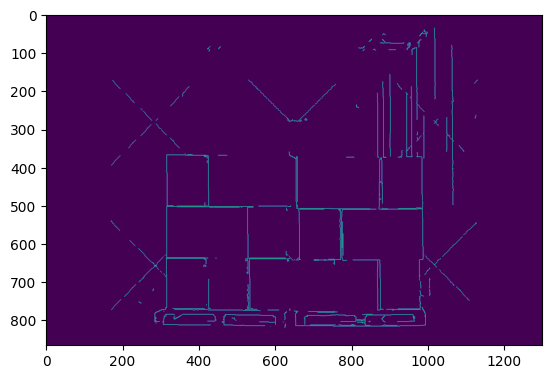

original image


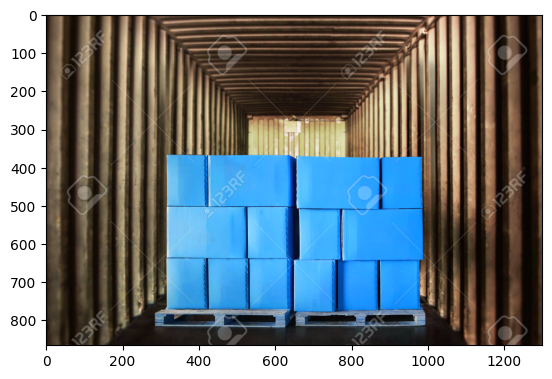

Number of boxes counted: 38


In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

image = cv2.imread('/content/test1.png')

image = Image.fromarray(image)
enhancer=ImageEnhance.Color(image)
image=enhancer.enhance(1.6)
image = np.array(image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (3, 3), 0)

sharp = cv2.addWeighted(gray, 1.495, blurred, -0.4981, 0)

edges = cv2.Canny(sharp, 300, 500)

contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

box_count = 0

for contour in contours:
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    if len(approx) == 4:
        box_count += 1

        cv2.drawContours(edges, [approx], -1, (0, 255, 0), 2)

plt.imshow(edges)
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

print("original image")
plt.imshow(image)
plt.show()
print(f"Number of boxes counted: {box_count}")